In the "Performance Boosts Using a B-Tree" file, we learned how to implement B-tree nodes. In this file, we'll implement the actual B-tree.

To keep the operations efficient, we need to enforce a few properties on the tree structure. Remember that our node implementation keeps the keys sorted within a node.

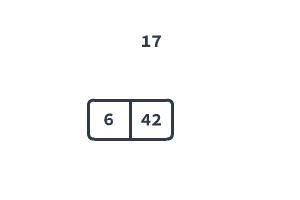

In [2]:
from IPython.display import Image

Image("5.1-m232.gif")

We'll extend this order property to the entire tree. In particular, we'll make sure that the number of children in a non-leaf node is always the number of keys plus one. For example, if a node stores two entries, it will have three children.

Since there is one more child than there are keys, we can imagine that the children and keys alternate inside the node. That is, first comes a child, then a key, then a child, then another key, and so on. The next figure illustrates this mental model:

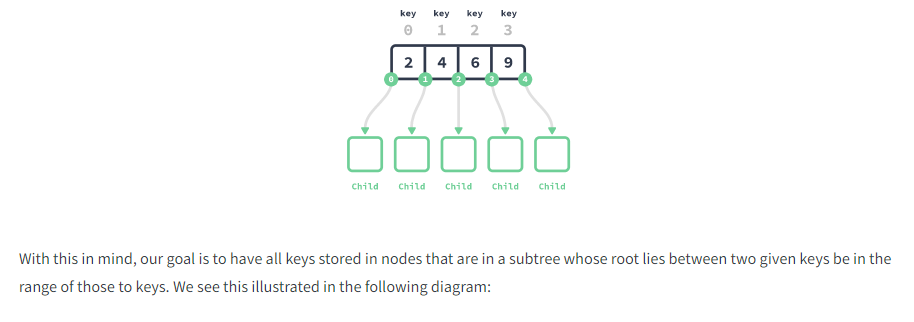

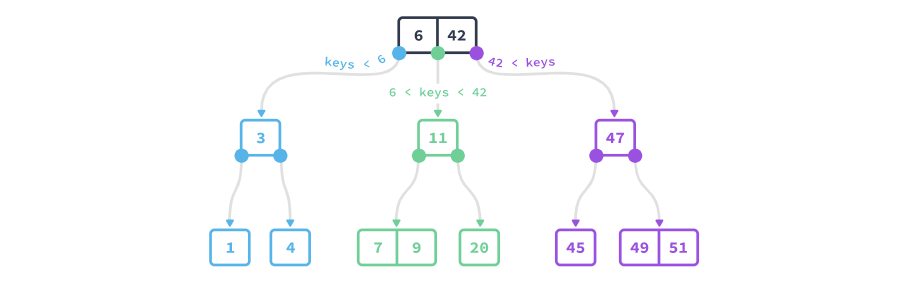

As we can see, all keys in first subtree are smaller than `6`, all keys in the second subtree are between `6` and `42`, and all keys in the last subtree are greater than `42`.

Let's start implementing a class to represent the B-tree. We'll start by creating an empty node to represent the root of the tree. We'll also keep track of the height and number of nodes in the tree.

**Task**

The `Node` class from the "Performance Boosts Using a B-Tree" file is available in file `node.py`.

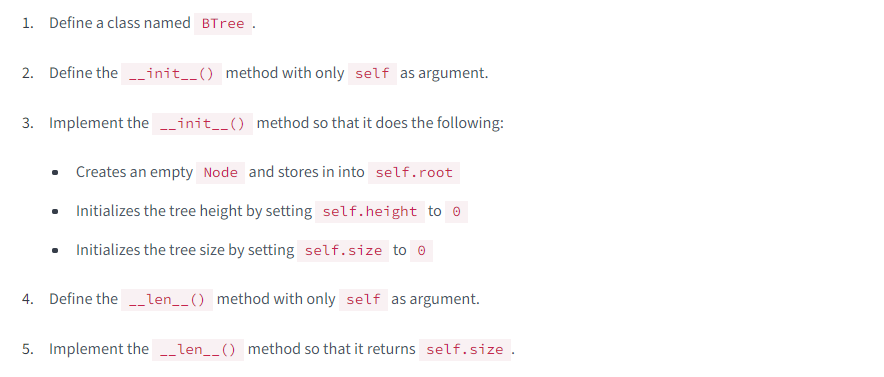

**Answer**

In [3]:
from node import Node

class BTree:

    def __init__(self):
        self.root = Node()
        self.height = 0
        self.size = 0

    def __len__(self):
        return self.size

Now we'll implement a method that, given a key, returns the node containing that key. If the key isn't stored in the tree, the method returns `None`.

Imagine that we want to check whether the following B-tree contains an entry with key equal to `9`:

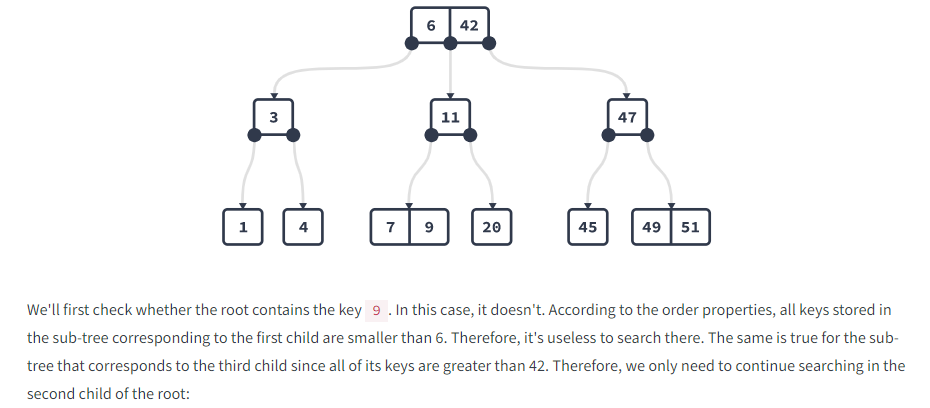

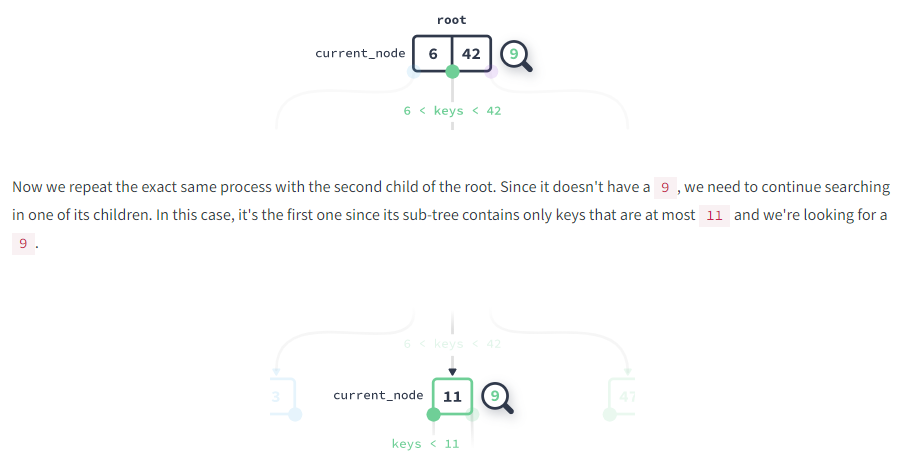

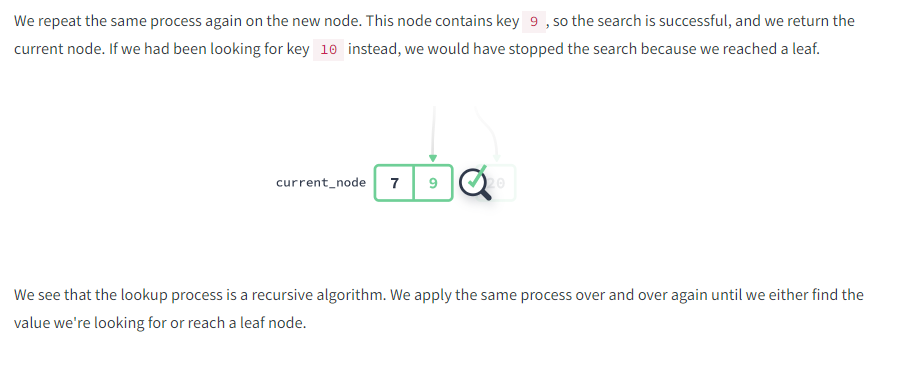

**Task**

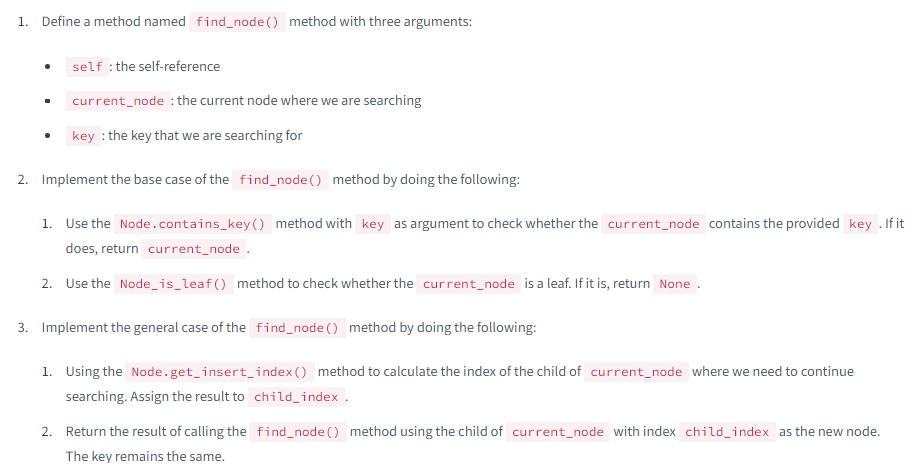

**Answer**

In [4]:
class BTree:

    def __init__(self):
        self.root = Node()
        self.height = 0
        self.size = 0

    def __len__(self):
        return self.size
    
    def find_node(self, current_node, key):
        if current_node.contains_key(key): # Instruction 2.1
            return current_node
        if current_node.is_leaf(): # Instruction 2.2
            return None
        child_index = current_node.get_insert_index(key) # Instruction 3.1
        return self.find_node(current_node.children[child_index], key) # Instruction 3.2

Above we implemented a method to find a node when given a key.

However, because of the recursive nature of the method, we needed to keep track of the current node in the method arguments. This means that, whenever we want to check whether the B-tree contains a key, we need to pass in the root, like so:

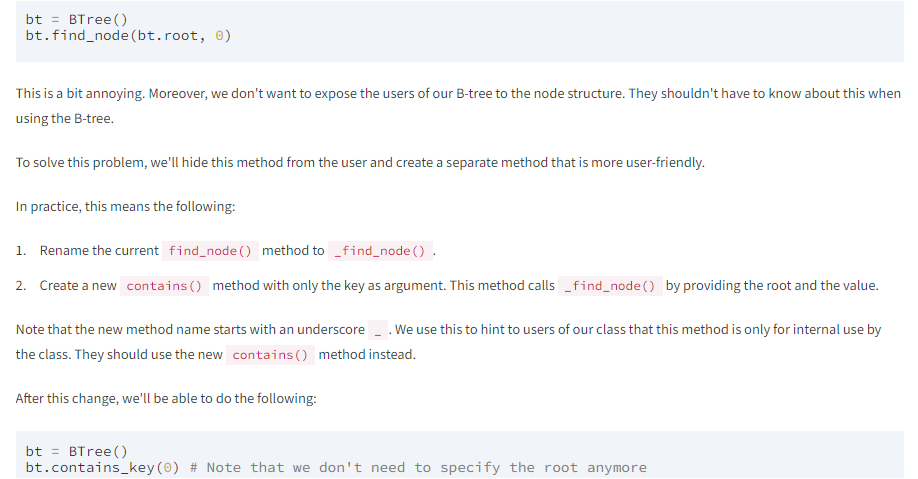

**Task**

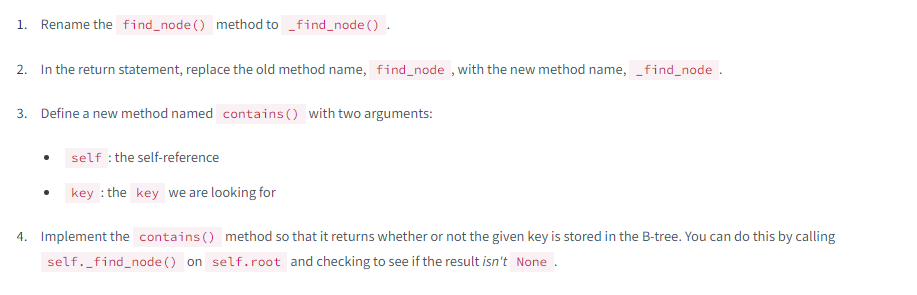

**Answer**

In [5]:

class BTree:

    def __init__(self):
        self.root = Node()
        self.height = 0
        self.size = 0

    def __len__(self):
        return self.size
    
    def _find_node(self, current_node, key): # Instruction 1
        if current_node.contains_key(key):
            return current_node
        if current_node.is_leaf():
            return None
        child_index = current_node.get_insert_index(key) 
        return self._find_node(current_node.children[child_index], key) # Instruction 2
    
    def contains(self, key): # Instruction 3
        node = self._find_node(self.root, key) # Instruction 4
        return node is not None

Now we can look up a node from a given key and check whether a given key is stored in the B-tree.

Now we'll implement a method that, given a key, returns the value associated with that key. If the key isn't stored in the tree, the method should return `None`.

The implementation of this method is very similar to the implementation of the `contains()` method above.

1. We use the method` _find_node()` to find whether there is a node storing the provided key.
2. If there is such a node, we call the `Node.get_value()` method to retrieve the value associated with the key.

**Task**

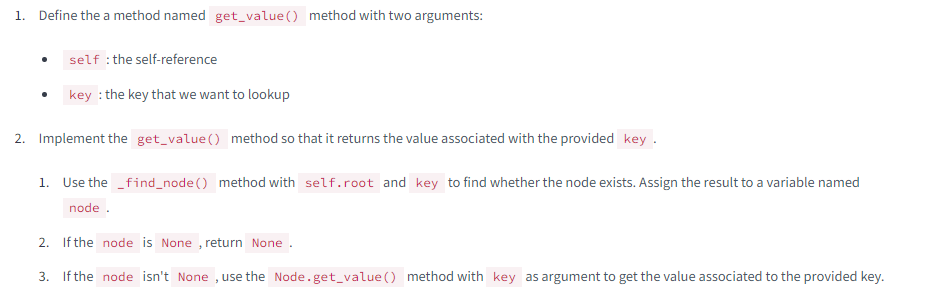

**Answer**

In [6]:
class BTree:

    def __init__(self):
        self.root = Node()
        self.height = 0
        self.size = 0

    def __len__(self):
        return self.size
    
    def _find_node(self, current_node, key):
        if current_node.contains_key(key):
            return current_node
        if current_node.is_leaf():
            return None
        child_index = current_node.get_insert_index(key) 
        return self._find_node(current_node.children[child_index], key)
    
    def contains(self, key):
        node = self._find_node(self.root, key)
        return not node is None
    
    def get_value(self, key): # Instruction 1
        node = self._find_node(self.root, key) # Instruction 2.1
        if node is None: # Instruction 2.2
            return None
        return node.get_value(key) # Instruction 2.3

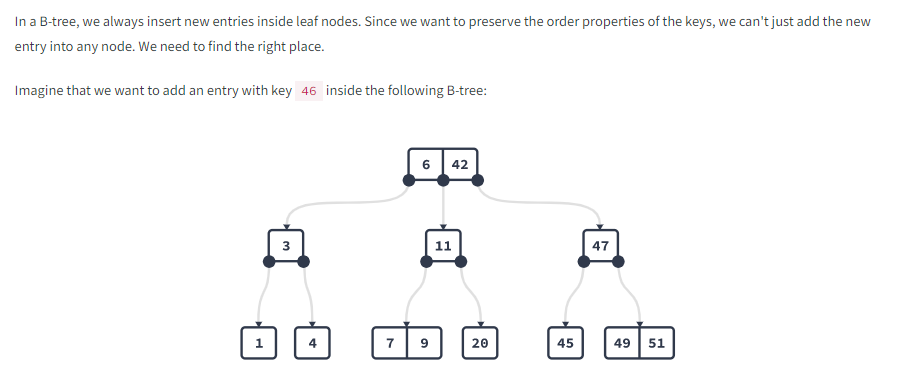

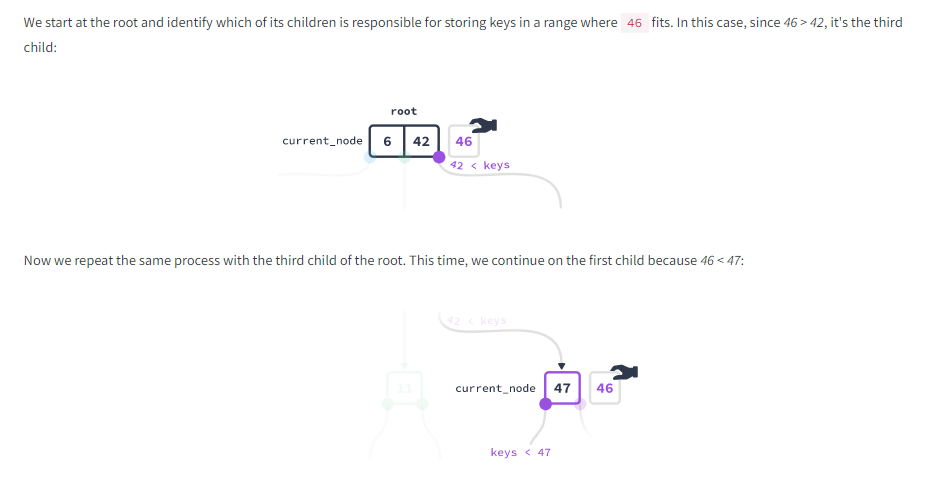

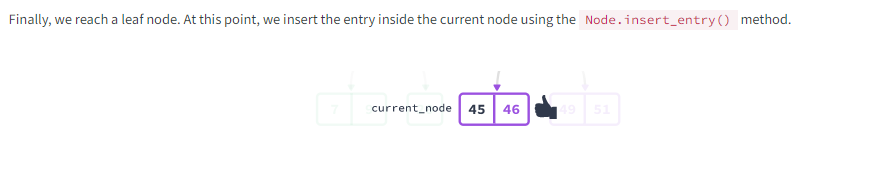

**Task**

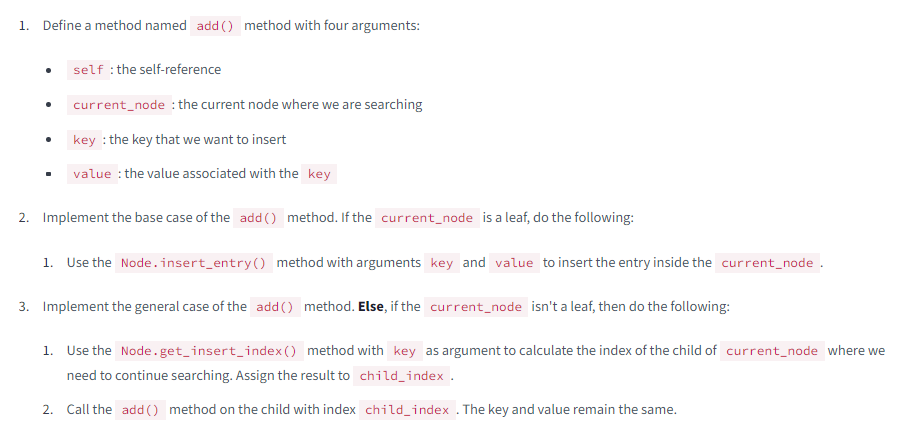

**Answer**

In [7]:
class BTree:

    def __init__(self):
        self.root = Node()
        self.height = 0
        self.size = 0

    def __len__(self):
        return self.size
    
    def _find_node(self, current_node, key):
        if current_node.contains_key(key):
            return current_node
        if current_node.is_leaf():
            return None
        child_index = current_node.get_insert_index(key) 
        return self._find_node(current_node.children[child_index], key)
    
    def contains(self, key):
        node = self._find_node(self.root, key)
        return not node is None
    
    def get_value(self, key):
        node = self._find_node(self.root, key)
        if node is None:
            return None
        return node.get_value(key)
    
    def add(self, current_node, key, value): # Instruction 1
        if current_node.is_leaf(): 
            current_node.insert_entry(key, value) # Instruction 2.1
        else:
            child_index = current_node.get_insert_index(key) # Instruction 3.1
            self.add(current_node.children[child_index], key, value) # Instruction 3.2

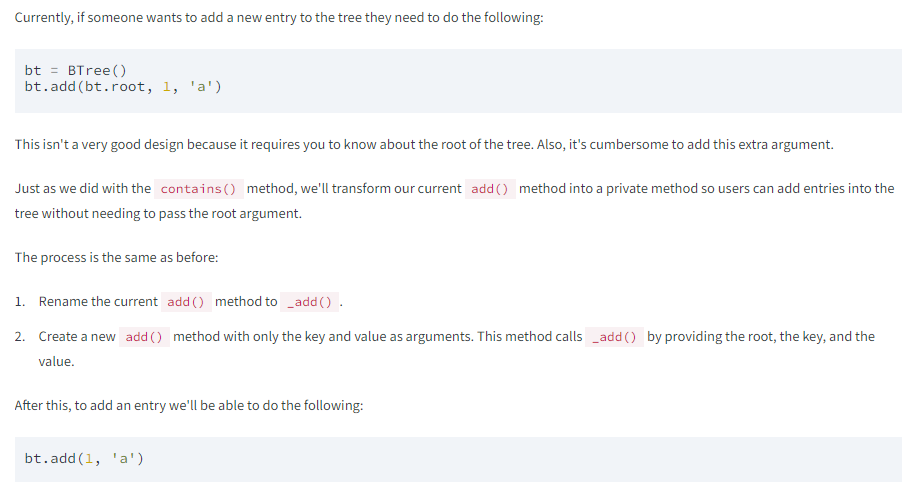

We will also increase the size of the tree every time the new `add()` method gets called. This way, we can effortlessly keep track of how many entries are stored in the tree.

**Task**

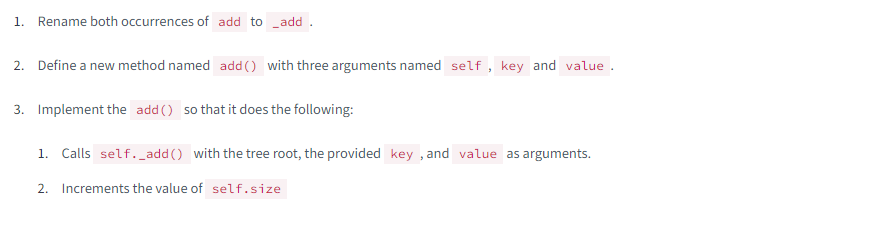

**Answer**

In [9]:
class BTree:

    def __init__(self):
        self.root = Node()
        self.height = 0
        self.size = 0

    def __len__(self):
        return self.size
    
    def _find_node(self, current_node, key):
        if current_node.contains_key(key):
            return current_node
        if current_node.is_leaf():
            return None
        child_index = current_node.get_insert_index(key) 
        return self._find_node(current_node.children[child_index], key)
    
    def contains(self, key):
        node = self._find_node(self.root, key)
        return not node is None
    
    def get_value(self, key):
        node = self._find_node(self.root, key)
        if node is None:
            return None
        return node.get_value(key)
    
    def _add(self, current_node, key, value): # Instruction 1
        if current_node.is_leaf(): 
            current_node.insert_entry(key, value)
        else:
            child_index = current_node.get_insert_index(key)
            self._add(current_node.children[child_index], key, value) # Instruction 2
    
    def add(self, key, value):
        self._add(self.root, key, value) # Instruction 3
        self.size += 1 # Instruction 4

We can now add and lookup entries in our B-tree! However, our implementation isn't complete. With the current implementation, we'll always have a single node that stores all entries!

Before we complete our implementation, let's run an experiment to see that this is, indeed, the case.

We can verify that no matter how many entries are added, the current implementation only uses a single node to store all of those entries. Let's create an empty tree and add 10 entries. Then, we'll print the root node and verify that it stores all 10 entries and has no children. This is normal since we aren't creating new nodes yet.

**Task**

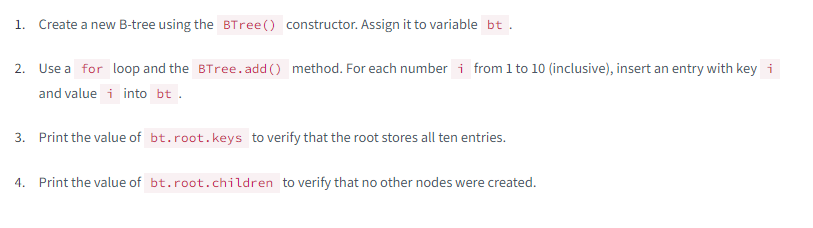

**Answer**

In [10]:
bt = BTree()
for i in range(1, 11):
    bt.add(i, i)
    
print(bt.root.keys)
print(bt.root.children)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[]


Above we observed that all entries are being stored in the root node. This isn't what we want because it makes all operations run in O(N), where N is the number of entries in the tree. Our goal is to have logarithmic time complexity, O(log(N)).

Now we'll see that with just a few lines of code, we'll fix that problem. The idea is to call the `Node.split()` method when the number of entries inside a node exceeds a given threshold. This threshold will be a parameter that we'll give to the B-tree constructor (`__init__()` method).

For example, imagine that we set the threshold to two. Then, whenever a node reaches three entries, it splits in two. This results in two child nodes with one value each. The parent node has one new value.

The following animation illustrates inserting an entry with a key equal to `10` on a B-tree with a threshold equal to two:

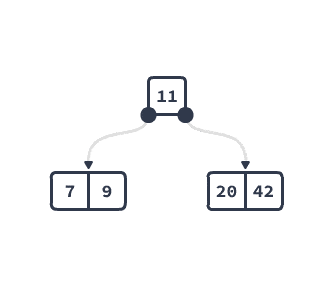

In [11]:
Image("8.1-m233.gif")

In some cases, we need to split nodes all the way to the root. This happens because splitting a node causes a new entry to move to the parent node. The parent can then have too many entries and require a split. We can see this happen if we add the value `43`:

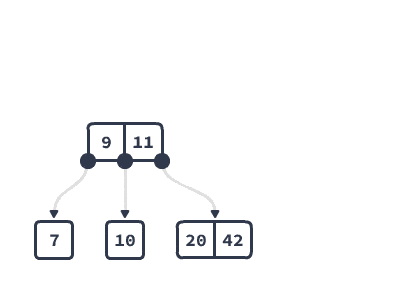

In [12]:
Image("8.2-m233.gif")

As we can see in this animation, sometimes, we'll split the root of the tree. In this case, the `Node.split()` method will create a new parent, and we need to update the root to be equal to that new parent.

Implementing this might seem intimidating, but as we will see, using recursion, we can do it in just a few lines of code.

**Task**

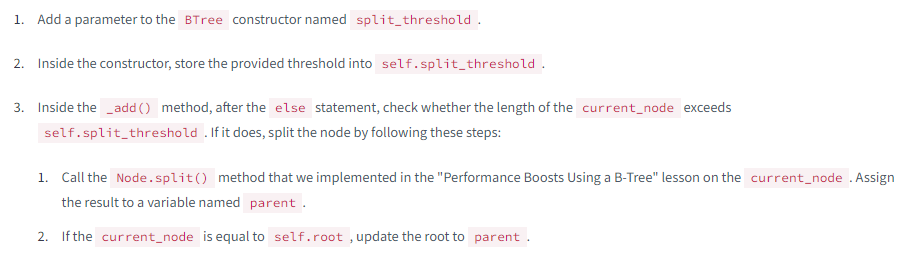

**Answer**

In [13]:
class BTree:

    def __init__(self, split_threshold): # Instruction 1
        self.split_threshold = split_threshold # Instruction 2
        self.root = Node()
        self.height = 0
        self.size = 0

    def __len__(self):
        return self.size
    
    def _find_node(self, current_node, key):
        if current_node.contains_key(key):
            return current_node
        if current_node.is_leaf():
            return None
        child_index = current_node.get_insert_index(key) 
        return self._find_node(current_node.children[child_index], key)
    
    def contains(self, key):
        node = self._find_node(self.root, key)
        return not node is None
    
    def get_value(self, key):
        node = self._find_node(self.root, key)
        if node is None:
            return None
        return node.get_value(key)
    
    def _add(self, current_node, key, value):
        if current_node.is_leaf(): 
            current_node.insert_entry(key, value)
        else:
            child_index = current_node.get_insert_index(key)
            self._add(current_node.children[child_index], key, value)
        # Add split code here
        if len(current_node) > self.split_threshold: # Instruction 3
            parent = current_node.split() # Instruction 3.1
            if current_node == self.root: # Intruction 3.2
                self.root = parent
    
    def add(self, key, value):
        self._add(self.root, key, value)
        self.size += 1

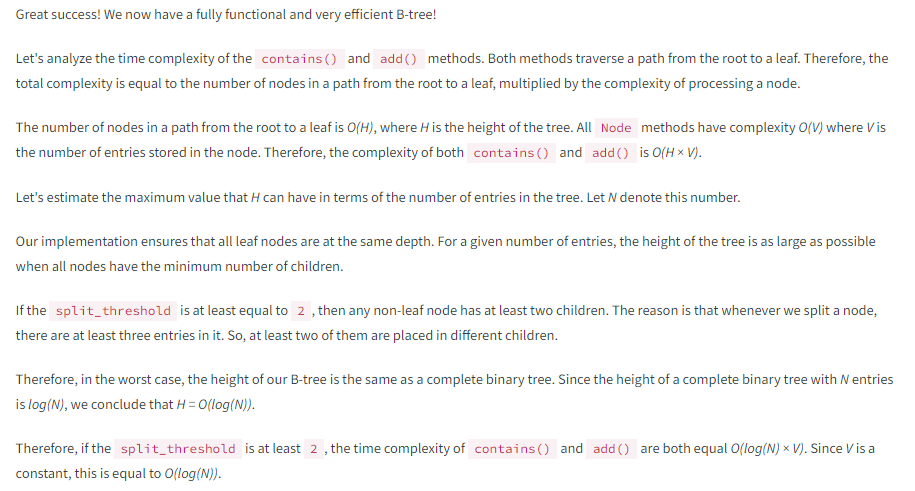

Let's do a practical experiment to verify this. We will add 1,000 entries inside the B-tree and keep track of its height as we insert them. Then we'll plot the height and verify that it is growing logarithmically.

To keep track of the height of the tree, note that the height only increases when we split the root node. We can then keep track of it by incrementing `self.height` whenever this happens.

**Task**

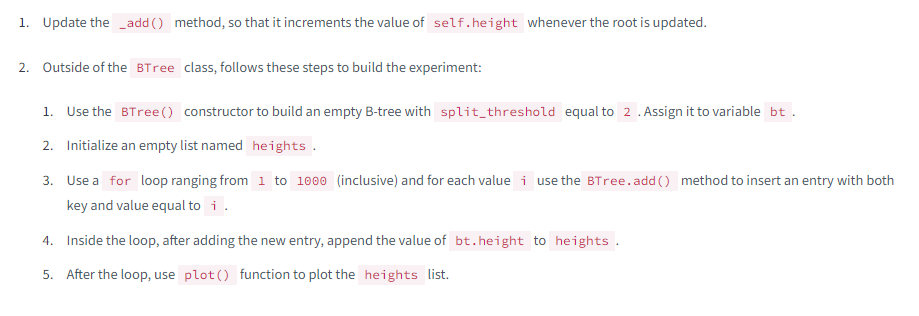

**Answer**

In [17]:
class BTree:

    def __init__(self, split_threshold):
        self.split_threshold = split_threshold
        self.root = Node()
        self.height = 0
        self.size = 0

    def __len__(self):
        return self.size
    
    def _find_node(self, current_node, key):
        if current_node.contains_key(key):
            return current_node
        if current_node.is_leaf():
            return None
        child_index = current_node.get_insert_index(key) 
        return self._find_node(current_node.children[child_index], key)
    
    def contains(self, key):
        node = self._find_node(self.root, key)
        return not node is None
    
    def get_value(self, key):
        node = self._find_node(self.root, key)
        if node is None:
            return None
        return node.get_value(key)
    
    def _add(self, current_node, key, value):
        if current_node.is_leaf(): 
            current_node.insert_entry(key, value)
        else:
            child_index = current_node.get_insert_index(key)
            self._add(current_node.children[child_index], key, value)
        if len(current_node) > self.split_threshold:
            parent = current_node.split()
            if current_node == self.root:
                self.root = parent
                # Increment height here
                self.height += 1 # Instruction 1
    
    def add(self, key, value):
        self._add(self.root, key, value)
        self.size += 1

# Add experiment here
bt = BTree(2) # Instruction 2.1
heights = [] # Instruction 2.2
for i in range(1, 1001): 
    bt.add(i, i) # Instruction 2.3
    heights.append(bt.height) # Instruction 2.4
# plot(heights) # Instruction 2.5

Above, we got the following results:

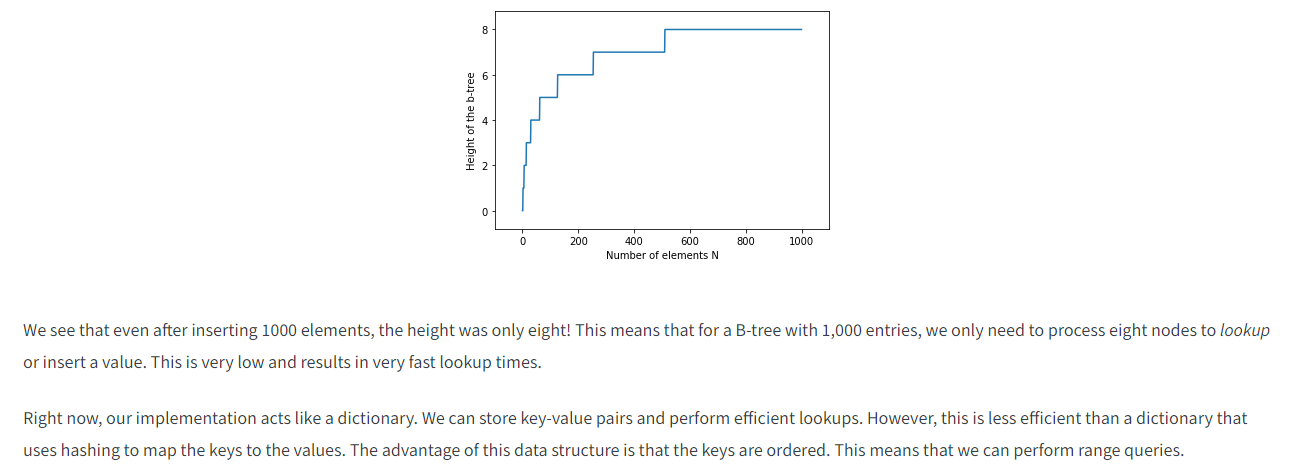

In the next file, we'll use the B-tree implementation to build an index for a CSV file. We'll add a method to perform range queries.